# load images and resize them 

In [1]:
from os import listdir
from PIL import Image 
from skimage.io import imread, imshow
from skimage.transform import resize
import numpy as np
from skimage.color import rgb2gray


def load_resize(images_path):
    # return array of resized images
    imagesList = listdir(images_path)
    loadedResizedImages = []
    for image in imagesList:
        img = imread(images_path + image)
        grayimg = rgb2gray(img)
        resized_img = resize(grayimg,(32,32))
        loadedResizedImages.append(resized_img)

    return loadedResizedImages

<ipython-input-1-2276c3d9f1e0>:15: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  grayimg = rgb2gray(img)


Text(0.5, 1.0, 'canvas')

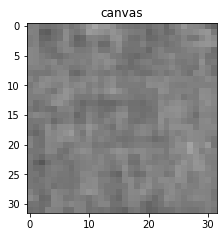

In [2]:
dirs = ['canvas1','cushion1','linsseeds1','sand1','seat2','stone1']
train = []
for dir_ in dirs :
    train.append(load_resize("textures\\training"+"\\"+dir_+"\\"))
train = [list for sublist in train for list in sublist]

test = []
for dir_ in dirs :
    test.append(load_resize("textures\\testing"+"\\"+dir_+"\\"))
test = [list for sublist in test for list in sublist]

import matplotlib.pyplot as plt

plt.subplot(121), imshow(train[0])
plt.title('canvas') 



In [3]:
print(len(train))
print(len(test))

180
60


# Images matching 

In [4]:
trainflatten_img = []
for img in train:
    trainflatten_img.append(list(img.flatten()))

testflatten_img = []
for img in test:
    testflatten_img.append(list(img.flatten()))

In [5]:
print(len(trainflatten_img[0]))
print(len(testflatten_img[0]))

1024
1024


In [6]:
def cc_fun(imageA,imageB,normalize):

    if normalize == 'y':
          cor = np.sum(np.multiply(np.array(imageA),np.array(imageB))) / np.sqrt(np.sum(np.square(np.array(imageA)))*np.sum(np.square(np.array(imageB))))
    else:  
          cor = np.sum(np.multiply(np.array(imageA),np.array(imageB)))
            
    return cor

def conv_fun(imageA,imageB,normalize):
    if normalize == 'y':
        imageA = (imageA-np.mean(imageA))/(np.std(imageA))
        imageB = (imageB-np.mean(imageB))/(np.std(imageB))
        conv = np.sum(np.multiply(np.array(imageA),np.array(np.flipud(imageB))))
    else:
        conv = np.sum(np.multiply(np.array(imageA),np.array(np.flipud(imageB))))
        
    return conv

def ssd_fun(imageA,imageB,normalize):
    if normalize == 'y':
        imageA = (imageA-np.mean(imageA))/(np.std(imageA))
        imageB = (imageB-np.mean(imageB))/(np.std(imageB))
        ssd = np.sum((np.array(imageA) - np.array(imageB))**2)
    else:                  
        ssd = np.sum((np.array(imageA) - np.array(imageB))**2)
                       
    return ssd

def matchingImages( imageA, imageB, method, normalize='n'):
    if method == 'cc' : 
        return cc_fun(imageA,imageB,normalize)
    elif method == 'conv' :
        return conv_fun(imageA,imageB,normalize)
    elif method == 'ssd' : 
        return ssd_fun(imageA,imageB,normalize)

In [7]:
import random
i = random.choice(range(len(trainflatten_img)))
j = random.choice(range(len(trainflatten_img)))
print(matchingImages(trainflatten_img[i],trainflatten_img[j],'ssd','n'))

8.144514609765483


# Pair images

In [8]:
from itertools import combinations        
import pandas as pd

pairs = pd.DataFrame(columns=('imageA','imageB','Label'))
counter=0      
res = list(combinations(trainflatten_img, 2))
for i in range(len(res)):
    pairs.at[counter,'imageA']=res[i][0]
    pairs.at[counter,'imageB']=res[i][1]
    counter+=1

test_pairs = pd.DataFrame(columns=('imageA','imageB','Label'))
count=0  
res_test = list(combinations(testflatten_img, 2))
for i in range(len(res_test)):
    test_pairs.at[count,'imageA']=res_test[i][0]
    test_pairs.at[count,'imageB']=res_test[i][1]
    count+=1

In [9]:
pairs.head()

,imageA,imageB,Label
0,"[0.4960784313725489, 0.5019607843137255, 0.452...","[0.4, 0.4215686274509804, 0.43823529411764706,...",NaN
1,"[0.4960784313725489, 0.5019607843137255, 0.452...","[0.48725490196078425, 0.48627450980392156, 0.4...",NaN
2,"[0.4960784313725489, 0.5019607843137255, 0.452...","[0.5617647058823529, 0.5343137254901962, 0.456...",NaN
3,"[0.4960784313725489, 0.5019607843137255, 0.452...","[0.45294117647058835, 0.4647058823529411, 0.47...",NaN
4,"[0.4960784313725489, 0.5019607843137255, 0.452...","[0.5196078431372548, 0.4784313725490196, 0.486...",NaN


# Train data & Test data

In [10]:
class1=trainflatten_img[:30]
class2=trainflatten_img[30:60]
class3=trainflatten_img[60:90]
class4=trainflatten_img[90:120]
class5=trainflatten_img[120:150]
class6=trainflatten_img[150:]

# print(len(class1))
# print(len(class2))
# print(len(class3))
# print(len(class4))
# print(len(class5))
# print(len(class6))

truth = pairs.copy()
for i in range(len(truth)):
    if truth.imageA[i] in class1 and truth.imageB[i] in class1:
        truth.loc[i,'Label']=1
    elif truth.imageA[i] in class2 and truth.imageB[i] in class2:
        truth.loc[i,'Label']=1
    elif truth.imageA[i] in class3 and truth.imageB[i] in class3:
        truth.loc[i,'Label']=1
    elif truth.imageA[i] in class4 and truth.imageB[i] in class4:
        truth.loc[i,'Label']=1
    elif truth.imageA[i] in class5 and truth.imageB[i] in class5:
        truth.loc[i,'Label']=1
    elif truth.imageA[i] in class6 and truth.imageB[i] in class6:
        truth.loc[i,'Label']=1
    else: truth.loc[i,'Label']=0


In [11]:
truth.head()

,imageA,imageB,Label
0,"[0.4960784313725489, 0.5019607843137255, 0.452...","[0.4, 0.4215686274509804, 0.43823529411764706,...",1
1,"[0.4960784313725489, 0.5019607843137255, 0.452...","[0.48725490196078425, 0.48627450980392156, 0.4...",1
2,"[0.4960784313725489, 0.5019607843137255, 0.452...","[0.5617647058823529, 0.5343137254901962, 0.456...",1
3,"[0.4960784313725489, 0.5019607843137255, 0.452...","[0.45294117647058835, 0.4647058823529411, 0.47...",1
4,"[0.4960784313725489, 0.5019607843137255, 0.452...","[0.5196078431372548, 0.4784313725490196, 0.486...",1


(array([13500.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2610.]),
 array([0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001,
        0.7000000000000001, 0.8, 0.9, 1.0], dtype=object),
 <BarContainer object of 10 artists>)

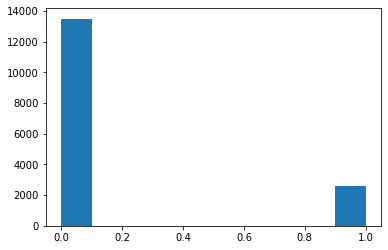

In [12]:
from matplotlib.pyplot import hist
plt.hist(truth['Label'])

In [13]:
class1=testflatten_img[:10]
class2=testflatten_img[10:20]
class3=testflatten_img[20:30]
class4=testflatten_img[30:40]
class5=testflatten_img[40:50]
class6=testflatten_img[50:]

# print(len(class1))
# print(len(class2))
# print(len(class3))
# print(len(class4))
# print(len(class5))
# print(len(class6))

testing = test_pairs.copy()
for i in range(len(testing)):
    if testing.imageA[i] in class1 and testing.imageB[i] in class1:
        testing.loc[i,'Label']=1
    elif testing.imageA[i] in class2 and testing.imageB[i] in class2:
        testing.loc[i,'Label']=1
    elif testing.imageA[i] in class3 and testing.imageB[i] in class3:
        testing.loc[i,'Label']=1
    elif testing.imageA[i] in class4 and testing.imageB[i] in class4:
        testing.loc[i,'Label']=1
    elif testing.imageA[i] in class5 and testing.imageB[i] in class5:
        testing.loc[i,'Label']=1
    elif testing.imageA[i] in class6 and testing.imageB[i] in class6:
        testing.loc[i,'Label']=1
    else: testing.loc[i,'Label']=0


# classifier data using match images function

In [14]:
t_cor_n=[]
t_cor=[]
t_conv_n=[]
t_conv=[]
t_ssd_n=[]
t_ssd=[]
for i in range(len(pairs)):  
        t_cor_n.append(matchingImages(pairs.imageA[i],pairs.imageB[i],'cc','y'))
        t_cor.append(matchingImages(pairs.imageA[i],pairs.imageB[i],'cc','n'))
        t_conv_n.append(matchingImages(pairs.imageA[i],pairs.imageB[i],'conv','y'))
        t_conv.append(matchingImages(pairs.imageA[i],pairs.imageB[i],'conv','n'))
        t_ssd_n.append(matchingImages(pairs.imageA[i],pairs.imageB[i],'ssd','y'))
        t_ssd.append(matchingImages(pairs.imageA[i],pairs.imageB[i],'ssd','n'))
Tcor_n = sum(t_cor_n)/len(t_cor_n)
Tcor = sum(t_cor)/len(t_cor)
Tconv_n = sum(t_conv_n)/len(t_conv_n)
Tconv = sum(t_conv)/len(t_conv)
Tssd_n = sum(t_ssd_n)/len(t_ssd_n)
Tssd = sum(t_ssd)/len(t_ssd)


In [15]:
print('Tcor_n',Tcor_n)
print('Tcor',Tcor)
print('Tconv_n',Tconv_n)
print('Tconv',Tconv)
print('Tssd_n',Tssd_n)
print('Tssd',Tssd)

Tcor_n 0.9853362502604934
Tcor 249.98652284276508
Tconv_n -5.030632242754579
Tconv 249.96776050388772
Tssd_n 2031.9820963827817
Tssd 7.466723324255023


In [16]:
classifier = pairs.copy()
for i in range(len(classifier)):
    t = matchingImages(classifier.imageA[i],classifier.imageB[i],'ssd','n')
    if Tssd >= t:
        classifier.loc[i,'Label']=1
    else:
        classifier.loc[i,'Label']=0

In [17]:
classifier.head()

,imageA,imageB,Label
0,"[0.4960784313725489, 0.5019607843137255, 0.452...","[0.4, 0.4215686274509804, 0.43823529411764706,...",1
1,"[0.4960784313725489, 0.5019607843137255, 0.452...","[0.48725490196078425, 0.48627450980392156, 0.4...",1
2,"[0.4960784313725489, 0.5019607843137255, 0.452...","[0.5617647058823529, 0.5343137254901962, 0.456...",1
3,"[0.4960784313725489, 0.5019607843137255, 0.452...","[0.45294117647058835, 0.4647058823529411, 0.47...",1
4,"[0.4960784313725489, 0.5019607843137255, 0.452...","[0.5196078431372548, 0.4784313725490196, 0.486...",1


(array([8018.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        8092.]),
 array([0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001,
        0.7000000000000001, 0.8, 0.9, 1.0], dtype=object),
 <BarContainer object of 10 artists>)

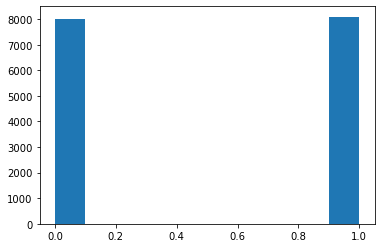

In [18]:
from matplotlib.pyplot import hist
plt.hist(classifier['Label'])

## validate classification data using validation data

In [19]:
val_tru = truth.loc[:4110]
val_clas = classifier.loc[:4110]

In [20]:
from sklearn.metrics import classification_report

print(classification_report(val_tru['Label'].astype(int), val_clas['Label'].astype(int)))

              precision    recall  f1-score   support

           0       1.00      0.24      0.39      3686
           1       0.13      1.00      0.23       425

    accuracy                           0.32      4111
   macro avg       0.57      0.62      0.31      4111
weighted avg       0.91      0.32      0.37      4111



In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(val_tru['Label'].astype(int), val_clas['Label'].astype(int))

array([[ 886, 2800],
       [   0,  425]], dtype=int64)

## validate classification data using testing data

In [22]:
test_classifier = test_pairs.copy()
for i in range(len(test_classifier)):
    t = matchingImages(test_classifier.imageA[i],test_classifier.imageB[i],'ssd','n')
    if Tssd >= t:
        test_classifier.loc[i,'Label']=1
    else:
        test_classifier.loc[i,'Label']=0

In [23]:
from sklearn.metrics import classification_report

print(classification_report(testing['Label'].astype(int), test_classifier['Label'].astype(int)))

              precision    recall  f1-score   support

           0       0.85      0.55      0.66      1500
           1       0.15      0.46      0.23       270

    accuracy                           0.53      1770
   macro avg       0.50      0.50      0.45      1770
weighted avg       0.74      0.53      0.60      1770



# MLP classifier

In [24]:
Train = []
#concatenate images
for i in range(len(truth)):
    li = truth.imageA[i].copy()
    for j in truth.imageB[i] : 
        li.append(j) 
    Train.append(li)
#np.array(train).shape



## before sampling

In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
y = (truth['Label'].loc[4110:]).astype(int)
# X_train, X_test, y_train, y_test = train_test_split(np.array(train[4110:]), y, stratify=y,random_state=1)
clf = MLPClassifier(random_state=1, max_iter=300).fit(np.array(Train[4110:]), y)


In [26]:
val = []
#concatenate images
for i in range(len(val_tru)):
    li = val_tru.imageA[i].copy()
    for j in val_tru.imageB[i] : 
        li.append(j) 
    val.append(li)
y_pred = clf.predict(np.array(val))
print(classification_report(val_tru['Label'].astype(int), y_pred))

              precision    recall  f1-score   support

           0       0.85      0.44      0.58      3686
           1       0.07      0.34      0.11       425

    accuracy                           0.43      4111
   macro avg       0.46      0.39      0.34      4111
weighted avg       0.77      0.43      0.53      4111



In [27]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
y = (truth['Label']).astype(int)
# X_train, X_test, y_train, y_test = train_test_split(np.array(train[4110:]), y, stratify=y,random_state=1)
clf = MLPClassifier(random_state=1, max_iter=300).fit(np.array(Train), y)


In [28]:
t = []
#concatenate images
for i in range(len(testing)):
    li = testing.imageA[i].copy()
    for j in testing.imageB[i] : 
        li.append(j) 
    t.append(li)
y_pred = clf.predict(np.array(t))
print(classification_report(testing['Label'].astype(int), y_pred))

              precision    recall  f1-score   support

           0       0.88      0.32      0.47      1500
           1       0.17      0.76      0.28       270

    accuracy                           0.39      1770
   macro avg       0.52      0.54      0.37      1770
weighted avg       0.77      0.39      0.44      1770



## after sampling

In [29]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='majority')
X_res, y_res = rus.fit_resample(np.array(Train[4110:]), (truth['Label'].loc[4110:]).astype(int))

(array([2185.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2185.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

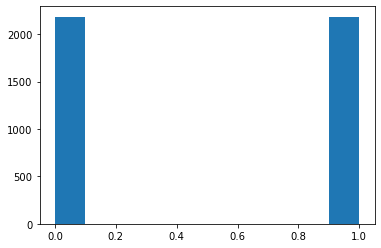

In [30]:
plt.hist(y_res)

In [31]:
from sklearn.neural_network import MLPClassifier
# X_train_, X_test_, y_train_, y_test_ = train_test_split(X_res, y_res, stratify=y_res,random_state=42)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_res, y_res)
y_pred = clf.predict(np.array(val))
print(classification_report(val_tru['Label'].astype(int), y_pred))

              precision    recall  f1-score   support

           0       0.89      0.23      0.36      3686
           1       0.10      0.75      0.18       425

    accuracy                           0.28      4111
   macro avg       0.49      0.49      0.27      4111
weighted avg       0.81      0.28      0.34      4111



C:\Users\potato\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [32]:
rus = RandomUnderSampler(sampling_strategy='majority')
X_res, y_res = rus.fit_resample(np.array(Train), (truth['Label']).astype(int))

In [33]:
from sklearn.neural_network import MLPClassifier
# X_train_, X_test_, y_train_, y_test_ = train_test_split(X_res, y_res, stratify=y_res,random_state=42)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_res, y_res)
y_pred = clf.predict(t)
print(classification_report(testing['Label'].astype(int), y_pred))

              precision    recall  f1-score   support

           0       0.86      0.41      0.55      1500
           1       0.16      0.63      0.26       270

    accuracy                           0.44      1770
   macro avg       0.51      0.52      0.41      1770
weighted avg       0.75      0.44      0.51      1770



- The accuracy of classifier according to a subset of data (validation data) with ssd as a matching method = 32%
- The accuracy of classifier according to testing data = 53%
- The accuracy of MLP model according to validation data before under sampling = 43%
- The accuracy of MLP model according to testing data before under sampling =  39%
- The accuracy of MLP model according to validation data after under sampling = 28%
- The accuracy of MLP model according to testing data after under sampling = 44%

From these accuracies we can say that the best is classifier model, that model predict better than the MLP before and after under sampling. Also under sampling make the model better may be beacuse the under sampling decrease the data so the model learn accuratly. and before under sampling the accuracy of MLP was worst than the classifier may be beacuse the data in MLP was unbalanced but in classifier the data was balanced.

The classifier model needed much effort than the MLP model because MLP was a builtin algorithm in sklearn in the oppesit of classifier model which needed many loops and many steps to get the treshold to classify the data.but the both of them weren't took much time to predict.

# Feature Engineering an Filtring 

In [53]:
import numpy as np
def features(imgs,bin=32):
    li = []
    for i in np.array(imgs):
        f, edges= np.histogram(i,bins=bin)
        li.append(f)
    return li

In [54]:
Train = features(Train)


In [55]:
Test = features(t)

In [56]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
y = (truth['Label'].loc[4110:]).astype(int)
# X_train, X_test, y_train, y_test = train_test_split(np.array(train[4110:]), y, stratify=y,random_state=1)

clf = MLPClassifier(random_state=1, max_iter=300).fit(np.array(Train[4110:]), y)


In [58]:
val = []
val_tru = truth.loc[:4110]
#concatenate images
for i in range(len(val_tru)):
    li = val_tru.imageA[i].copy()
    for j in val_tru.imageB[i] : 
        li.append(j) 
    val.append(li)
val = features(val)   
y_pred = clf.predict(np.array(val))
print(classification_report(val_tru['Label'].astype(int), y_pred))


              precision    recall  f1-score   support

           0       0.95      0.81      0.88      3686
           1       0.29      0.67      0.40       425

    accuracy                           0.79      4111
   macro avg       0.62      0.74      0.64      4111
weighted avg       0.89      0.79      0.83      4111

0       1
1       1
2       1
3       1
4       1
       ..
4106    0
4107    0
4108    0
4109    0
4110    0
Name: Label, Length: 4111, dtype: object


In [59]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
y = (truth['Label']).astype(int)
# X_train, X_test, y_train, y_test = train_test_split(np.array(train[4110:]), y, stratify=y,random_state=1)
clf = MLPClassifier(random_state=1, max_iter=300).fit(np.array(Train), y)


In [61]:
y_pred = clf.predict(np.array(Test))
print(classification_report(testing['Label'].astype(int), y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1500
           1       0.60      0.58      0.59       270

    accuracy                           0.88      1770
   macro avg       0.76      0.75      0.76      1770
weighted avg       0.88      0.88      0.88      1770



As expected the filtring increase the accuracy of the model because it get more features to train on it and learned more.Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.The accuracy become 88% which is better than the last 2 classifiers.